## 군집 ( Clustering )  
- 데이터셋을 클러스터라는 그룹으로 나누는 작업  
- 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표  
- 분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어느 클러스터에 속하는지 할당함

## k-평균 군집 k-Means Clustering
- 가장 간단하고 널리 사용하는 군집 알고리즘  
- 이 알고리즘은 데이터의 어떤 영역을 대표하는 클러스터 중심을 찾는다  
- 알고리즘은 다음의 두 단계를 반복함  
- 먼저 데이터 포인트를 가장 가까운 클러스터 중심에 할당, 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정  
- 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료  
- 다음은 예시용 데이터셋에 k-평균 군집을 적용한 예

In [25]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

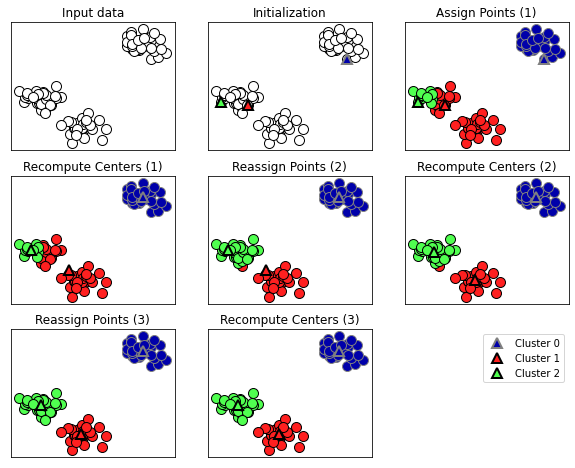

In [2]:
mglearn.plots.plot_kmeans_algorithm()

- 삼각형은 클러스터 중심이고 원은 데이터 포인트  
- 클러스터는 색으로 구분  
- 3개의 클러스터를 찾도록 지정해서 알고리즘이 클러스터 중심으로 지정할 데이터 포인트 3개를 무작위로 초기화  
- 그 후 알고리즘 반복, 먼저 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당, 할당한 포인트의 평균값으로 클러스터 중심을 갱신  
- 이런 과정을 두 번 더 반복, 세 번 <반복>한 후에 클러스터 중심에 할당되는 포인트가 변화가 없으므로 => 알고리즘이 멈춤  
- 다음은 위에서 학습시킨 클러스터 중심의 경계

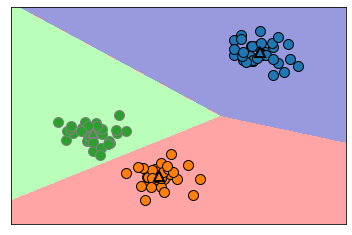

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
# Blobs DataSet 예시 - KMeans

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


- 세 개의 클러스터를 지정했으므로 각 클러스터는 0에서 2까지의 번호가 할당됨  
- 또 predict 메서드를 사용해 새로운 데이터의 클러스터 레이블을 예측할 수 있음  
- 예측은 각 포인트에 가장 가까운 클러스터 중심을 할당하는 것이며 기존 모델을 변경하지 않음  
- 훈련 세트에 대해 predict 메서드를 실행하면 labels_ 와 같은 결과를 얻음

In [7]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


- 군집은 각 데이터 포인트가 레이블을 가진다는 면에서 분류와 조금 비슷해 보임  
- 그러나 정답을 모르고 있으며 레이블 자체에 어떤 의미가 있지는 않음  
(숫자자체에 의미 없음, 서로 다르다는 것이 중요)
- 2차원 예제 데이터에서 군집 알고리즘을 적용할 때 한 그룹의 레이블은 0으로, 다른 그룹은 1로 지정되는 것은 중요하지 않음  
- 초기화를 무작위로 하기 때문에 알고리즘을 다시 실행하면 클러스터 번호가 다르게 부여될 수 있음 

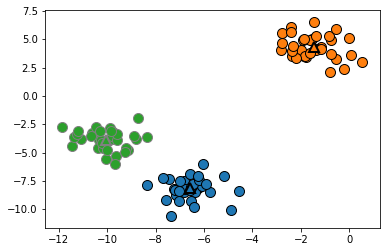

In [8]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, 
                         markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], 
                         [0, 1, 2], 
                         markers='^', markeredgewidth=2)
plt.show() 

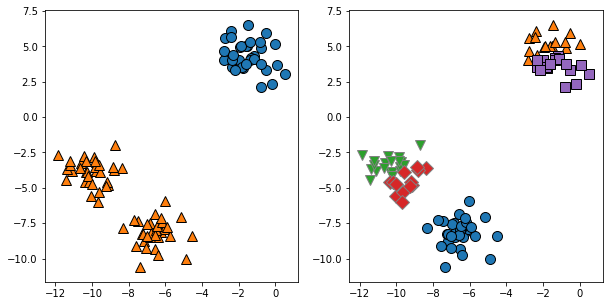

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

### k-평균 군집 알고리즘이 실패하는 경우
- 데이터셋의 클러스터 수를 정확하게 알고 있더라도 k-평균 군집 알고리즘이 항상 이를 구분해낼 수 있는 것은 아님
- 각 클러스터를 정의하는 것이 중심 하나뿐이므로 클러스터는 둥근 형태로 나타남
- 이런 이유로 k-평균 군집 알고고리즘은 비교적 간단한 형태를 구분할 수 있음
- 또한 K-평균 군집 은 모든 클러스터의 반경이 똑같다고 가정함
- 그래서 클러스터 중심 사이에 정확한 중간 경계를 그림

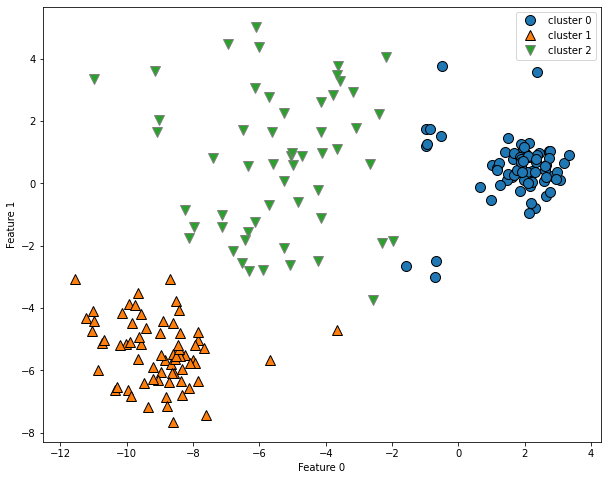

In [14]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

# cluster = 3 
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
plt.figure(figsize=(10,8))
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

- 왼쪽 아래에 모여 있는 영역을 첫 번째 클러스터(클러스터 1), 오른쪽 위의 밀집된 영역을 두 번째 클러스터(클러스터 0), 가운데 비교적 엉성한 영역을 세 번째 클러스터(클러스터 2) 라고 생각할 수 있음
- 그런데 클러스터 0과 클러스터 1은 클러스터 중심에서 멀리 떨어진 포인트들도 포함하고 있음(각 클러스터 중심간 중간 경계를 그리게 되면 멀리 떨어진 포인트들이 다른 클러스터 영역에 들어감)
- k-평규 군집은 또 클러스터에서 모든 방향이 똑같이 중요하다고 가정함

- 다음은 세 그룹으로 나뉜 2차원 데이터셋, 각 그룹들이 대각선으로 늘어서 있음
- k-평균 군집은 가장 가까운 클러스터 중심까지의 거리만 고려하기 때문에 이런 데이터를 잘 처리하지 못함

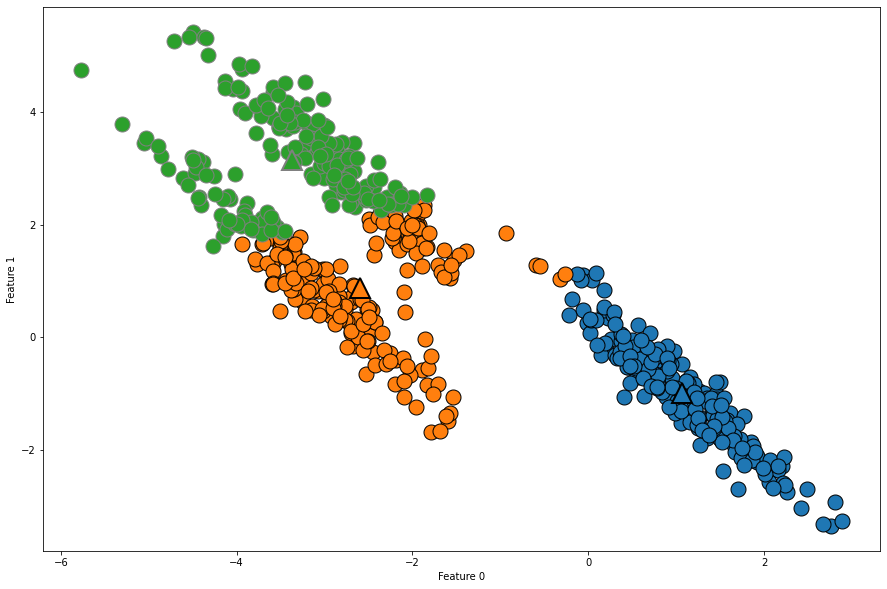

In [16]:
import numpy as np

# 무작위로 클러스터 데이터 생성합니다
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심*(주황 세모, 초록 세모, 파란 세모)을 나타냅니다
plt.figure(figsize=(15,10))
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o', s=15)
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2, s=20)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [ ]:
# kmeans 군집 문제점 => 반원 형태로 군집  => 쓸 수 x 

Text(0, 0.5, 'Feature 1')

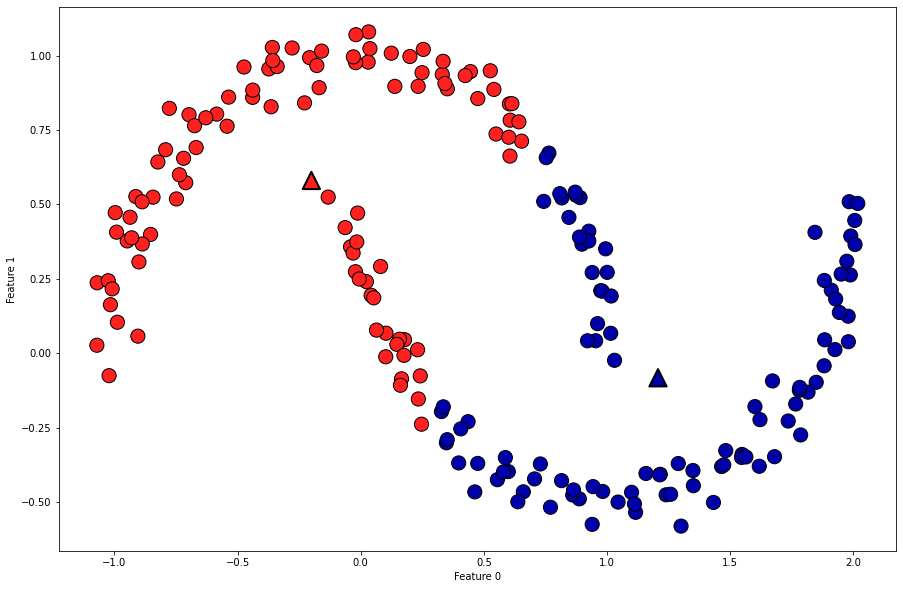

In [17]:
# two_moons 데이터를 생성합니다(이번에는 노이즈를 조금만 넣습니다)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=200, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=300, linewidth=2, edgecolors='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
# kmeans 군집 문제점 => 반원 형태로 군집  => 쓸 수 x 

### 개선 ! 

- 군집 알고리즘이 두 개의 반달 모양을 구분하면 좋겠지만 k-평균 군집 알고리즘을 사용해서는 어려움
- k-평균 군집은 입력 데이터의 차원보다 더 많은 클러스터를 사용해 데이터를 인코딩할 수 있음
- 이를 이용하면 위 데이터를 더 잘 표현할 수 있음

클러스터 레이블:
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


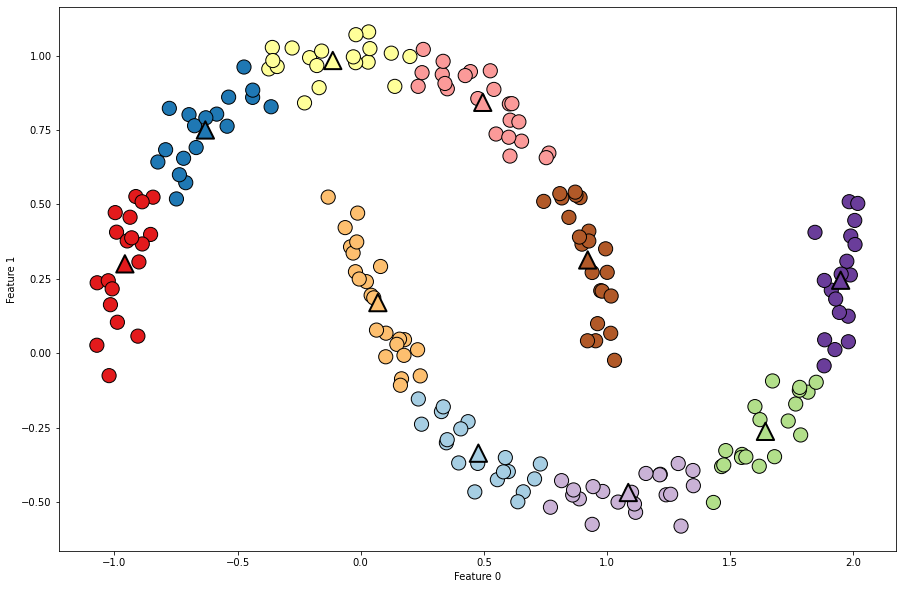

In [18]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=200, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("클러스터 레이블:\n", y_pred)

In [ ]:
# 조금 나아졌지만, 원하는 것 X => k-clusterring 여기까지가 한계 

### 정리
- k-평균 군집 알고리즘은 비교적 이해하기 쉽고 구현도 쉬울 뿐만 아니라 
비교적 빠르기 때문에 가장 인기 있는 군집 알고리즘  
- 대용량 데이터셋에서도 잘 동작하지만 scikit-learn 은
아주 큰 대규모 데이터셋을 처리할 수 있는 MiniBatchKMeans 도 제공함  
- k-평균 군집 알고리즘의 단점 하나는 => 
무작위 초기화를 사용하여 알고리즘의 출력이 난수 초깃값에 따라 달라진다는 점  
- 기본적으로 scikit-learn은 서로 다른 난수 초깃값으로 10번 반복하여 최선의 결과를 만듬  
- k-평균 군집 알고리즘의 더 큰 단점은 클러스터의 모양을 가정하고 있어서 활용 범위가 비교적 제한적이며, 찾
으려 하는 클러스터의 수를 지정해야 한다는 점  

In [ ]:
# 대체 가능한 효율적인 알고리즘 => ML 학자들 => sklearn 함수로 

### 병합 군집 Agglomerative Clustering
- 군집 알고리즘의 모임을 말함
- 시작할 때 각 포인트를 하나의 클러스터로 지정, 그 다음 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나감
- scikit-learn 에서 사용하는 종료 조건은 클러스터 개수로, 지정된 개수의 클러스터가 남을 때까지 비슷한 클러스터를 합침
- linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정, 이 측정은 항상 두 클러스터 사이에서 이루어짐

### scikit-learn 에 구현된 옵션
- ward : 기본값인 ward 연결은 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합침, 그래서 비교적 비슷한 클러스터가 만들어짐  
- average : average 연결은 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합침  
- complete : complete 연결은 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합침

- ward 가 대부분의 데이터셋에 알맞기 때문에 다음 예제에서 이 옵션을 사용  
- 클러스터에 속한 포인트 수가 많이 다를 땐 average 나 complete가 더 나을 수 있음  

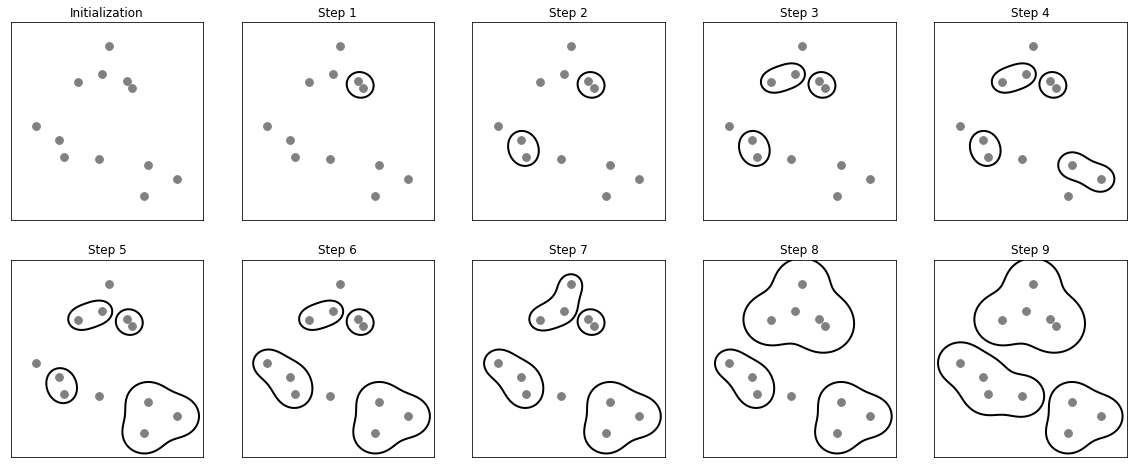

In [19]:
mglearn.plots.plot_agglomerative_algorithm()

- 초기에 각 포인트가 하나의 클러스터 임, 그 다음 각 단계에서 가장 가까운 두 클러스터가 합쳐짐  
- 네 번째 단계까지는 포인트가 하나뿐인 클러스터 두 개가 선택되어 합쳐져서 두 개의 포인트를 가진 클러스터가 되었음  
- 단계 5에서 두 개의 포인트를 가진 클러스터 중 하나가 세 개의 포인트로 확장됨  
- 이런 식으로 단계 9에 이르면 클러스터가 세 개만 남게 됨, 세 개의 클러스터를 찾는다고 지정했다면 알고리즘은 여기서 멈춤

- 알고리즘의 작동 특성상 병합 군집은 새로운 데이터 포인트에 대해서는 예측을 할 수 없음, 
- 그러므로 병합 군집은 predict 메서드가 없음
- 대신 훈련 세트로 모델을 만들고 클러서트 소속 정보를 얻기 위해서 fit_predict 메서드를 사용함(fit + predict)

Text(0, 0.5, 'Feature 1')

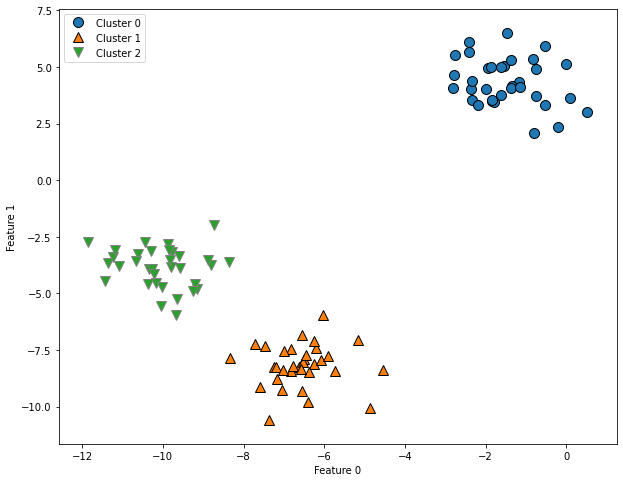

In [20]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
plt.figure(figsize=(10,8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
# https://bcho.tistory.com/1205 (참고)

## DBSCAN (Density-Based Spatial Clustering of Application with Noise)
- DBSCAN의 주요 장점은 클러스터의 수를 미리 지정할 필요가 없다는 것
- 이 알고리즘은 복잡한 형상도 찾을 수 있으며, 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있음
- DBSCAN은 병합 군집이나 k-평균 군집 보다는 다소 느리지만 
- 비교적 큰 데이터셋에도 적용할 수 있음

In [ ]:
# eps(epsilon) : 가운데 p 중심 ~ 겉 원 까지 거리 

### DBSCAN 원리
- DBSCAN은 특성 공간에서 가까이 있는 데이터가 많아 붐비는 지역의 포인트를 찾음  
- 이런 지역을 특성 공간의 밀집지역(dense region) 이라 함  
- DBSCAN의 아이디어는 => 데이터의 밀집지역이 한 클러스터를 구성하며, 비교적 비어있는 지역을 경계로 다른 클러스터와 구분된다는 것  
- 밀집 지역에 있는 포인트를 핵심 샘플(또는 핵심 포인트)이라 하며, 다음과 같이 정의  
- DBSCAN에는 두 개의 매개변수 min_samples와 eps가 있음  
- 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 수 만큼 들어 있으면 이 데이터 포인트를 핵심 샘플로 분류  
- eps보다 가까운 핵심 샘플은 DBSCAN에 의해 동일한 클러스터로 합쳐짐  
- 이 알고리즘은 시작할 때 무작위로 포인트를 선택, 그 포인트에서 eps 거리안의 모든 포인트를 찾음  
- 만약 eps 거리 안에 있는 포인트 수가 min_samples보다 적다면, 그 포인트는 어떤 클래스에도 속하지 않는 잡음(noise)으로 레이블 함  
- eps 거리 안에 min_samples 보다 많은 포인트가 있다면, 그 포인트는 핵심 샘플로 레이블하고 새로운 클러스터 레이블을 할당함  
- 그런 다음 그 포인트의 eps 거리 안의 모든 이웃을 살핌, 만약 어떤 클러스터에도 아직 할당되지 않았다면 바로 전에 만든 클러스터 레이블을 할당함  
- 만약 핵심 샘플이면 그 포인트의 이웃을 자례로 방문, 이런 식으로 계속 진행하여 클러스터는 eps 거리 안에 더 이상 핵심 샘플이 없을 때까지 자라남  
- 그런 다음 아직 방문하지 못한 포인트를 선택하여 같은 과정을 반복  
- 결국 포인트의 종류는 세 가지, 핵심 포인트/경계 포인트(핵심 포인트에서 eps 거리 안에 있는 포인트)/잡음 포인트  
- DBSCAN을 한 데이터셋에 여러 번 실행하면 핵심 포인트의 군집은 항상 같고 매번 같은 포인트를 잡음으로 레이블 함  
- 그러나 경계 포인트는 한 개 이상의 클러스터 핵심 샘플의 이웃일 수 있음  
- 그렇기 때문에 경계 포인트가 어떤 클러스터에 속할지는 포인트를 방문하는 순서에 따라 달라짐  
- 보통 경계 포인트는 많지 않으며 포인트 순서 때문에 받는 영향도 적어 중요한 이슈는 아님 

In [22]:
from sklearn.cluster import DBSCAN
X,y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster Label:\n", clusters)

Cluster Label:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


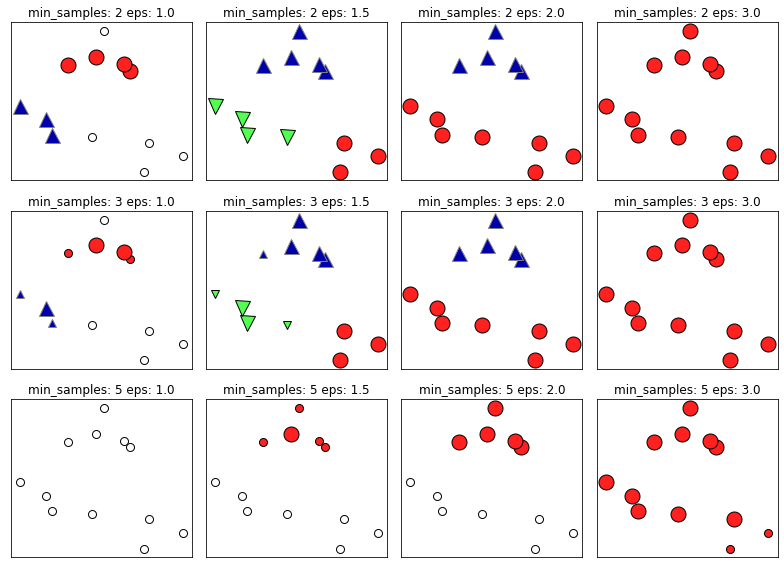

In [24]:
mglearn.plots.plot_dbscan()

- 이 그래프에서 클러스터에 속한 포인트는 색을 칠하고 잡음 포인트는 하얀색으로 남겼음  
- 핵심 샘플은 크게 표시, 경계 포인트는 작게 표시  
- eps를 증가시키면 (왼쪽에서 오른쪽) 하나의 클러스터에 더 많은 포인트가 포함됨, 이는 클러스터를 커지게 하지만 여러 클러스터를 하나로 합치게도 만듬  
- min_samples 를 키우면 (위에서 아래로) 핵심 포인트 수가 줄어들며 잡음 포인트가 늘어남  
- eps 매개변수는 가까운 포인트의 범위를 결정하기 때뭄에 더 중요함, eps를 매우 작게 하면 어떤 포인트도 핵심 포인트가 되지 못하고 모든 포인트가 잡음 포인트가 될 수 있음  
- eps를 매우 크게 하면 모든 포인트가 단 하나의 클러스터에 속하게 될 것임  
- min_samples 설정은 덜 조밀한 지역에 있는 포인트들이 잡음 포인트가 될 것인지, 아니면 하나의 클러스터가 될 것인지를 결정하는데 중요한 역할을 함  
- min_samples 를 늘리면 min_samples의 수보다 작은 클러스터들은 잡음 포인트가 됨, 그러므로 min_samples는 클러스터의 최소 크기를 결정함  
- 위 그림에서 eps=1.5 일 때 min_samples=3 과 min_samples=5의 그래프에서 이를 확인할 수 있음  
- min_samples=3 일 때는 포인트가 각각 4, 5, 3 개인 세 개의 클러스터가 있음  
- min_samples=5 일 때는 포인트가 4개와 3개인 작은 클러스터가 잡음 포인트로 바뀌고 5개 샘플을 가진 클러서터만 남음  
- DBSCAN은 클러스터의 수를 지정할 필요가 없지만 eps의 값은 간접적으로 몇 개의 클러스터가 만들어질지 제어함  
- 적절한 eps 값을 쉽게 찾으려면 StandardScaler 나 MinMaxScaler로 모든 특성의 스케일을 비슷한 범위로 조정해주는 것이 좋음 

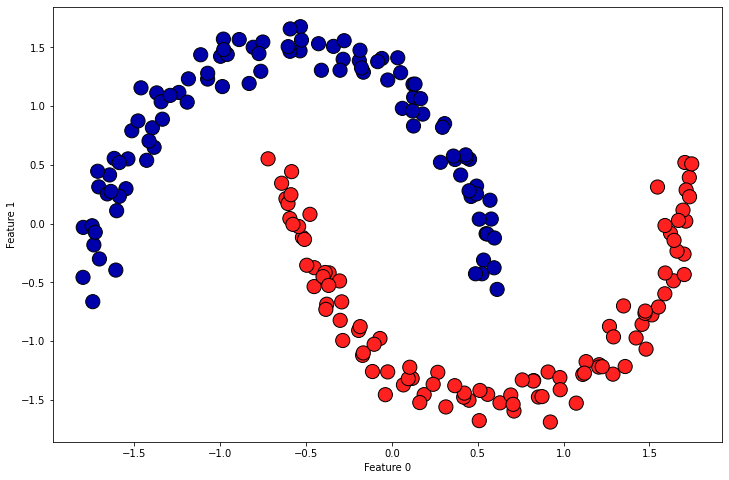

In [29]:
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.figure(figsize=(12,8))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters,\
           cmap=mglearn.cm2, s=200,\
           edgecolors='black')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

- 이 알고리즘은 예상한 클러스터 수 (2개)를 만들어내므로 매개변수 설정이 잘 맞는 것 같음  
- eps를 (기본값 0.5에서) 0.2로 내리면 너무 많은 8개의 클러스터를 만들어 냄  
- eps를 0.7로 올리면 클러스터를 하나만 만듬  
- DBSCAN을 사용할 때는 클러스터 할당 값을 주의해서 다뤄야 함  
- 클러스터 레이블을 다른 배열의 인덱스로 사용할 경우 잡음 포인트를 의미하는 -1 값이 예상치 못한 결과를 만들 수 있기 때문임

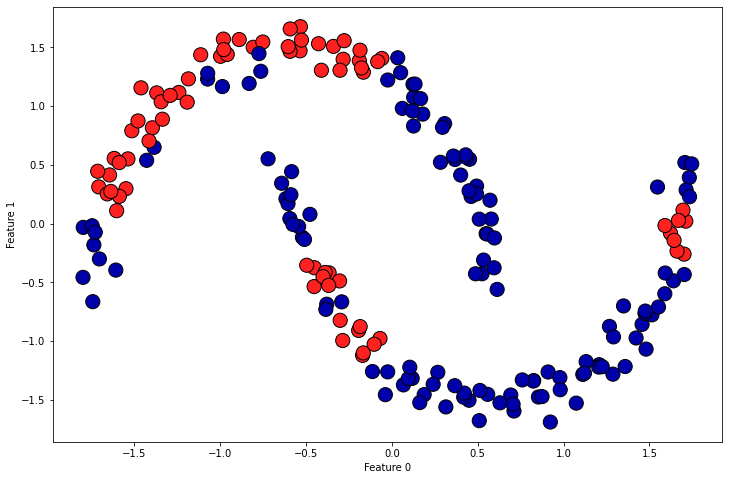

In [38]:
# eps 변경 

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
dbscan = DBSCAN(eps=0.15)
clusters = dbscan.fit_predict(X_scaled)
plt.figure(figsize=(12,8))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters,\
           cmap=mglearn.cm2, s=200,\
           edgecolors='black')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()